In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Working with a table of features from the Saccharomyces Genome Database (SGD)

The file [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) is a tab-delimited file I downloaded from SGD that summarizes key pieces of information about genome features in the budding yeast genome.  The original file can be found here: http://sgd-archive.yeastgenome.org/curation/chromosomal_feature/

Here's a short summary of the contents of this file, from the "SGD_features.README" document:

```
1. Information on current chromosomal features in SGD, including Dubious ORFs. 
Also contains coordinates of intron, exons, and other subfeatures that are located within a chromosomal feature.

2. The relationship between subfeatures and the feature in which they
are located is identified by the feature name in column #7 (parent
feature). For example, the parent feature of the intron found in
ACT1/YFL039C will be YFL039C. The parent feature of YFL039C is
chromosome 6.

3. The coordinates of all features are in chromosomal coordinates.

Columns within SGD_features.tab:

1.   Primary SGDID (mandatory)
2.   Feature type (mandatory)
3.   Feature qualifier (optional)
4.   Feature name (optional)
5.   Standard gene name (optional)
6.   Alias (optional, multiples separated by |)
7.   Parent feature name (optional)
8.   Secondary SGDID (optional, multiples separated by |)
9.   Chromosome (optional)
10.  Start_coordinate (optional)
11.  Stop_coordinate (optional)
12.  Strand (optional)
13.  Genetic position (optional)
14.  Coordinate version (optional)
15.  Sequence version (optional)
16.  Description (optional)

Note that "chromosome 17" is the mitochondrial chromosome.
```


Download [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) to your computer and then load it using the `read_csv` function, specifying the delimiter argument as a tab:

In [3]:
features = pd.read_csv("/Users/pmagwene/Downloads/SGD_features.tsv", delimiter="\t")

In [4]:
## what are the dimensions of this data set?
features.shape

(16454, 16)

In [5]:
features.columns

Index(['SGDID', 'Type', 'Qualifier', 'Name', 'Gene', 'Alias', 'Parent',
       'Secondary', 'Chromosome', 'Start', 'Stop', 'Strand', 'GeneticPosition',
       'CoordVersion', 'SeqVersion', 'Description'],
      dtype='object')

In [29]:
features.dtypes

SGDID               object
Type                object
Qualifier           object
Name                object
Gene                object
Alias               object
Parent              object
Secondary           object
Chromosome          object
Start              float64
Stop               float64
Strand              object
GeneticPosition    float64
CoordVersion        object
SeqVersion          object
Description         object
Length             float64
dtype: object

In [34]:
features.dtypesastype

SGDID               object
Type                object
Qualifier           object
Name                object
Gene                object
Alias               object
Parent              object
Secondary           object
Chromosome          object
Start              float64
Stop               float64
Strand              object
GeneticPosition    float64
CoordVersion        object
SeqVersion          object
Description         object
Length             float64
dtype: object

### How many genome features are there in the  yeast genome?

In [6]:
len(features)  

16454

In [7]:
features.shape[0]

16454

In [9]:
features["Length"] = np.abs(features.Stop - features.Start)

### How  many of those features are annotated as "ORFs" (open reading frames)?

In [11]:
orfs = features[features.Type == "ORF"]
len(orfs)

6604

### How many of the ORFS are designated as "Dubious"? How many are "Verified"?

In [12]:
dubious = orfs[orfs.Qualifier == "Dubious"]
len(dubious)

717

In [14]:
verified = orfs[orfs.Qualifier == "Verified"]
len(verified)

5155

In [16]:
features.dtypes

SGDID               object
Type                object
Qualifier           object
Name                object
Gene                object
Alias               object
Parent              object
Secondary           object
Chromosome          object
Start              float64
Stop               float64
Strand              object
GeneticPosition    float64
CoordVersion        object
SeqVersion          object
Description         object
Length             float64
dtype: object

In [17]:
c1len = 230218

In [55]:
orfs["Chromosome"].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '2',
       '2-micron', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [56]:
nucorfs = orfs[(orfs.Chromosome != "2-micron") & (orfs.Chromosome != "17")]

In [67]:
nucorfs["Chromosome"] = pd.to_numeric(nucorfs["Chromosome"])

/Users/pmagwene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
nucorfs.dtypes

SGDID               object
Type                object
Qualifier           object
Name                object
Gene                object
Alias               object
Parent              object
Secondary           object
Chromosome           int64
Start              float64
Stop               float64
Strand              object
GeneticPosition    float64
CoordVersion        object
SeqVersion          object
Description         object
Length             float64
Chromsome            int64
dtype: object

In [ ]:
plt.barh{}

(0.0, 5.0)

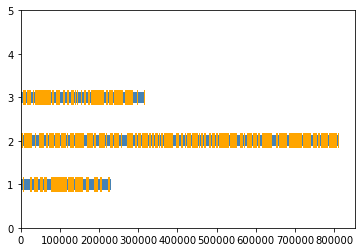

In [84]:
plt.barh(1, c1len, height=0.25, color='steelblue')
c1orfs = nucorfs[nucorfs.Chromosome == 1]
for (start,stop) in zip(c1orfs.Start, c1orfs.Stop):
    plt.barh(1, abs(stop - start), left=min(start, stop), color='orange', height=0.35)

c2len = 813184
plt.barh(2, c2len, 0.25, color='steelblue')
c1orfs = nucorfs[nucorfs.Chromosome == 2]
for (start,stop) in zip(c1orfs.Start, c1orfs.Stop):
    plt.barh(2, abs(stop - start), left=min(start, stop), color='orange', height=0.35)


c3len = 316620
plt.barh(3, c3len, height=0.25, color='steelblue')
c1orfs = nucorfs[nucorfs.Chromosome == 3]
for (start,stop) in zip(c1orfs.Start, c1orfs.Stop):
    plt.barh(3, abs(stop - start), left=min(start, stop), color='orange', height=0.35)

plt.ylim(0,5)

(0.0, 2.0)

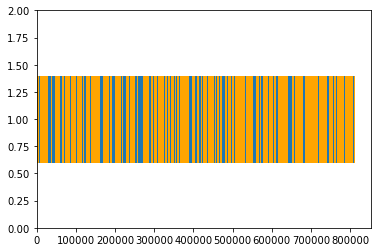

In [70]:
c2len = 813184
plt.barh(1, c2len)
c1orfs = nucorfs[nucorfs.Chromosome == 2]
for (start,stop) in zip(c1orfs.Start, c1orfs.Stop):
    plt.barh(1, abs(stop - start), left=min(start, stop), color='orange')
plt.ylim(0,2)

(0.0, 2.0)

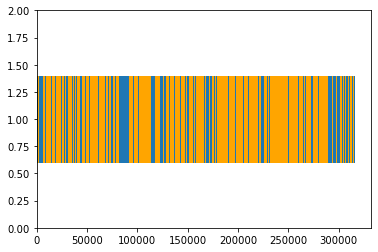

In [71]:
c2len = 316620
plt.barh(1, c2len)
c1orfs = nucorfs[nucorfs.Chromosome == 3]
for (start,stop) in zip(c1orfs.Start, c1orfs.Stop):
    plt.barh(1, abs(stop - start), left=min(start, stop), color='orange')
plt.ylim(0,2)

In [62]:
nucorfs[nucorfs.Chromosome == 1].head()

,SGDID,Type,Qualifier,Name,Gene,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description,Length,Chromsome


In [52]:
orfs.dtypes

SGDID               object
Type                object
Qualifier           object
Name                object
Gene                object
Alias               object
Parent              object
Secondary           object
Chromosome          object
Start              float64
Stop               float64
Strand              object
GeneticPosition    float64
CoordVersion        object
SeqVersion          object
Description         object
Length             float64
dtype: object

In [22]:
for orf in orfs:
    print(orf.Start)

AttributeError: 'str' object has no attribute 'Start'

In [25]:
for orf in zip(orfs.Start,orfs.Stop):
    print(orf)

(335.0, 649.0)
(538.0, 792.0)
(2169.0, 1807.0)
(2480.0, 2707.0)
(9016.0, 7235.0)
(10091.0, 10399.0)
(11951.0, 11565.0)
(12046.0, 12426.0)
(13743.0, 13363.0)
(21566.0, 21850.0)
(22685.0, 22395.0)
(27968.0, 24000.0)
(31567.0, 32940.0)
(33448.0, 34701.0)
(35155.0, 36303.0)
(36509.0, 37147.0)
(36918.0, 36496.0)
(37464.0, 38972.0)
(39046.0, 38696.0)
(39259.0, 41901.0)
(42177.0, 42719.0)
(45022.0, 42881.0)
(45899.0, 48250.0)
(48564.0, 51707.0)
(52595.0, 51855.0)
(54584.0, 54913.0)
(54789.0, 52801.0)
(56857.0, 54989.0)
(57385.0, 57029.0)
(57518.0, 57850.0)
(57796.0, 57488.0)
(58462.0, 57950.0)
(61052.0, 58695.0)
(61316.0, 62563.0)
(61608.0, 61231.0)
(62840.0, 65404.0)
(67520.0, 65778.0)
(69525.0, 68716.0)
(71786.0, 73288.0)
(73300.0, 72326.0)
(73518.0, 73426.0)
(74020.0, 74823.0)
(76152.0, 75043.0)
(76427.0, 79435.0)
(79718.0, 80587.0)
(79842.0, 79489.0)
(81951.0, 80710.0)
(82706.0, 83227.0)
(84474.0, 83335.0)
(84669.0, 84977.0)
(87031.0, 84749.0)
(87286.0, 87752.0)
(92270.0, 87855.0)
(92900.

### What is the distribution of length of dubious ORFs? What is the distribution of lengths of verified ORFs?

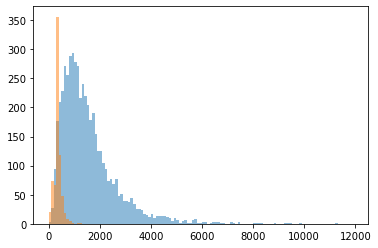

In [113]:
plt.hist(validated.Length, alpha=0.5, bins=np.arange(0,12000,100))
plt.hist(dubious.Length, alpha=0.5, bins=np.arange(0,12000,100))
pass

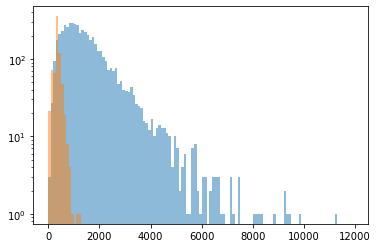

In [114]:
plt.hist(validated.Length, alpha=0.5, bins=np.arange(0,12000,100),log=True)
plt.hist(dubious.Length, alpha=0.5, bins=np.arange(0,12000,100), log=True)
pass

In [95]:
dubious.Length.median(), validated.Length.median()

(347.0, 1283.0)

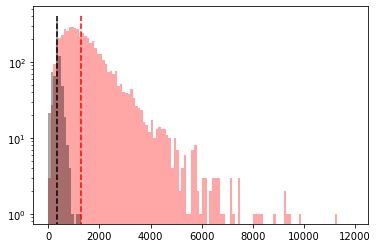

In [129]:
plt.hist(validated.Length, color='red', alpha=0.35, bins=np.arange(0,12000,100),log=True)
plt.hist(dubious.Length, color='black', alpha=0.35, bins=np.arange(0,12000,100), log=True)
plt.vlines(dubious.Length.median(), ymin=0, ymax=400, color='black', linestyle="dashed")
plt.vlines(validated.Length.median(), ymin=0, ymax=400, color='red', linestyle="dashed")
pass

### Using the groupby method to calculate aggregate statistics

In [98]:
orfs.groupby("Qualifier").count().Length

Qualifier
Dubious                    717
Uncharacterized            728
Verified                  5155
Verified|silenced_gene       4
Name: Length, dtype: int64

In [99]:
orfs.groupby("Qualifier").Length.median()

Qualifier
Dubious                    347.0
Uncharacterized            579.5
Verified                  1283.0
Verified|silenced_gene     506.5
Name: Length, dtype: float64

In [100]:
orfs.groupby("Qualifier").Length.mean()

Qualifier
Dubious                    355.919107
Uncharacterized            865.314560
Verified                  1548.793210
Verified|silenced_gene     501.000000
Name: Length, dtype: float64

In [101]:
orfs.groupby("Qualifier").Length.std()

Qualifier
Dubious                    140.844625
Uncharacterized            893.707602
Verified                  1134.825493
Verified|silenced_gene     112.880468
Name: Length, dtype: float64

In [136]:
orfs.Chromosome.value_counts().sort_values()

2-micron      4
17           28
1           117
6           139
3           184
9           241
8           321
5           323
11          348
10          398
14          435
2           456
13          505
16          511
12          578
7           583
15          597
4           836
Name: Chromosome, dtype: int64

In [139]:
df.sort_values("Length")

,Name,Start,Stop,Product,Length
2,E,26245,26472,envelope protein,227
3,M,26523,27191,membrane glycoprotein,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259
1,S,21563,25384,surface glycoprotein,3821
0,ORF1ab,266,21555,ORF1ab polyprotein,21289


In [157]:
cols = ["Name","Gene","Chromosome","Length","Description"]
orfs.sort_values("Length", ascending=False).loc[:,cols][:50]

,Name,Gene,Chromosome,Length,Description
2523,YLR106C,MDN1,12,14732.0,Huge dynein-related AAA-type ATPase (midasin);...
8569,Q0045,COX1,17,12883.0,Subunit I of cytochrome c oxidase (Complex IV)...
1973,YKR054C,DYN1,11,12278.0,Cytoplasmic heavy chain dynein; microtubule mo...
15453,YHR099W,TRA1,8,11234.0,Subunit of SAGA and NuA4 histone acetyltransfe...
12102,YDR457W,TOM1,4,9806.0,E3 ubiquitin ligase of the hect-domain class; ...
2179,YLL040C,VPS13,12,9434.0,Protein involved in prospore membrane morphoge...
8559,Q0070,AI5_ALPHA,17,9349.0,Endonuclease I-SceIV; involved in intron mobil...
9408,YBR140C,IRA1,2,9278.0,GTPase-activating protein; negatively regulate...
6093,YOL081W,IRA2,15,9239.0,GTPase-activating protein; negatively regulate...
2477,YLR087C,CSF1,12,8876.0,Protein required for fermentation at low tempe...
